***Note: this is the stoichBondGraph.ipynb notebook. The
PDF version "The stoichBondGraph module: From Stoichiometry to Bond Graph"
is available [here](stoichBondGraph.pdf).***

# Introduction
The bond graph approach 
<cite data-cite="OstPerKat71,OstPerKat73,GawCra14,GawCurCra15,GawCra16,GawCra17"></cite> 
to modelling biomolecular systems of interest to systems biologists developed independently from the stoichiometric approach 
<cite data-cite="Pal06,Pal11,Pal15"></cite>.

However, the conceptual point of intersection of the two approaches is the fact that the stoichiometric matrix is the modulus of the conceptual multiport transformer linking reactions to species.
This means that the two approaches are complementary and each can build on the strengths of the other.

This tutorial illustrates how a stoichiometric system description can be used to automatically create the corresponding bond graph. However, more compex systems such as the ecoli core model 
<cite data-cite="OrtFlePal10"></cite>
can also be translated in the same way.



## Import some python code
The bond graph analysis uses a number of Python modules:

In [1]:
## Some useful imports
import BondGraphTools as bgt
import numpy as np

## Stoichiometry to BG
import stoichBondGraph as stbg

# Create a stoichiometric representation

In this context a stoichimetric representation is a python dictionary with the following fields

- name (string): the name of the bg to be created
- N (numpy integer array): the stoichiometric matrix
- species (list of strings): the names of the species
- reaction (list of strings): the names of the reaction

Optionally, the forward and reverse stoichometric matrices Nf and Nr can be included instead of N

Note that there is one species per row, and one reaction per column, of N

A file name.py is written containing the function model() which returns the bg in bgt form


## Example
This example corresponds to ABCD_abg.svg in Tutorial svgBondGraph.

In [2]:
## Stoichiometric matrix N
N = np.array(
    [
     [-1, 0, 0, 0],
     [ 0,-1, 0, 0],
     [ 0, 0, 1, 0],
     [ 0, 0, 0, 1],
     [-1, 0, 0, 1],
     [ 1,-1, 0, 0],
     [ 0, 1,-1, 0],
     [ 0, 0, 1,-1]
    ]
)

## Species and reactions
species = ['A', 'B', 'C', 'D', 'E1', 'E2', 'E3', 'E4']
reaction = ['r1', 'r2', 'r3', 'r4']

## Pack into a dict with name 'ABCDE_abg'
s = {
    'name':'BG_abg',
    'N':N,
    'species':species,
    'reaction':reaction
    }

## Convert to a bondgraph
stbg.model(s)


In [3]:
import BG_abg; BG = BG_abg.model(); help(BG_abg)

Help on module BG_abg:

NAME
    BG_abg

FUNCTIONS
    model()
        Acausal bond graph BG_abg.py
        Created by stoichBondGraph at Wed May 22 09:59:40 2024
        
        Usage:
        import BG_abg; model = BG_abg.model()

FILE
    /home/peterg/WORK/Research/SystemsBiology/Notes/2024/Tutorial/stoichBondGraph/BG_abg.py




Various properties of the BGT model can now be extracted.

In [4]:
BG.state_vars

{'x_0': (C: A, 'q_0'),
 'x_1': (C: B, 'q_0'),
 'x_2': (C: C, 'q_0'),
 'x_3': (C: D, 'q_0'),
 'x_4': (C: E1, 'q_0'),
 'x_5': (C: E2, 'q_0'),
 'x_6': (C: E3, 'q_0'),
 'x_7': (C: E4, 'q_0')}

In [5]:
BG.constitutive_relations

[K_A*K_E1*kappa_r1*x_0*x_4 - K_E2*kappa_r1*x_5 + dx_0,
 K_B*K_E2*kappa_r2*x_1*x_5 - K_E3*kappa_r2*x_6 + dx_1,
 K_C*K_E4*kappa_r3*x_2*x_7 - K_E3*kappa_r3*x_6 + dx_2,
 K_D*K_E1*kappa_r4*x_3*x_4 - K_E4*kappa_r4*x_7 + dx_3,
 K_A*K_E1*kappa_r1*x_0*x_4 + K_D*K_E1*kappa_r4*x_3*x_4 - K_E2*kappa_r1*x_5 - K_E4*kappa_r4*x_7 + dx_4,
 -K_A*K_E1*kappa_r1*x_0*x_4 + K_B*K_E2*kappa_r2*x_1*x_5 + K_E2*kappa_r1*x_5 - K_E3*kappa_r2*x_6 + dx_5,
 -K_B*K_E2*kappa_r2*x_1*x_5 - K_C*K_E4*kappa_r3*x_2*x_7 + K_E3*kappa_r2*x_6 + K_E3*kappa_r3*x_6 + dx_6,
 K_C*K_E4*kappa_r3*x_2*x_7 - K_D*K_E1*kappa_r4*x_3*x_4 - K_E3*kappa_r3*x_6 + K_E4*kappa_r4*x_7 + dx_7]

In [6]:
BG.control_vars

{}

## Draw the BG

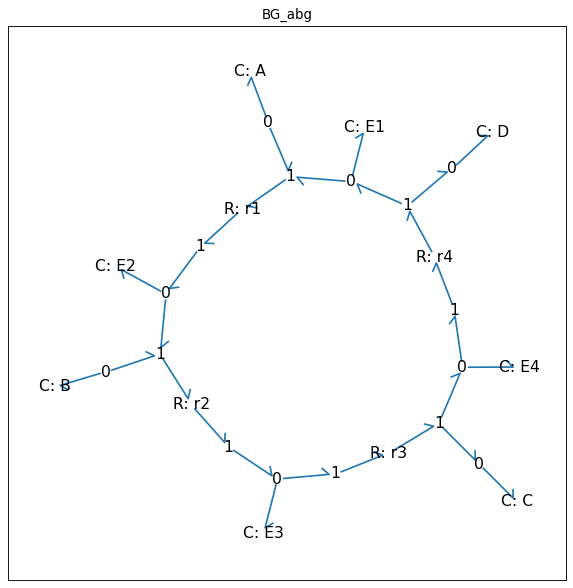

In [7]:
## Draw the BG
bgt.draw(BG_abg.model())